# Basic model of perceptual inference
* Basic implementation of Jazayeri and Movshon, 2006 Nature Neuroscience

* The model  addresses the issue of how to combine the output of multiple sensory neurons in order to infer the most likely state of a stimulus that is driving the observed pattern of responses across the entire population of cells. This is a classic problem in sensory neuroscience (or really any area where you're combining noisy/ambiguous signals to make an optimal inference). The reason the problem is so interesting is that the output of a single neuron is almost useless for performing inference, even if the neuron has a highly stable output (e.g. an orientation tuning function) that can be robustly measured. This ambiguity arises for a few reasons. 

* First, there is variability (the unpredictable kind, i.e. 'noise') in the output of neurons - so a response of 50Hz might be observed to stimulus 1 on trial 1, but a response of 40Hz might be observed on trial 2, etc. Second, the tuning function of most sensory neurons is non-monotonic (e.g. Gaussian-ish), so that almost all repsonse states are consistent with at least two possible stimuli (even in the complete absence of noise). Thus, a single measurement from a single neuron cannot be used to reliably transmit much information at all about the stimulus that was most likely to have caused a response. 

* Instead, inference about sensory stimuli is thought to be based on the output of many sensory neurons that are tuned to different points across a given feature space. For example, if you have just two neurons, and they are tuned to different points in feature space, it immediately becomes much easier to discriminate which feature was presented based on the output PATTERN across the two neurons. The more neurons you add (generally speaking) the more accurate your inference will be in the presence of noise because each neuron will contribute a little bit to disambiguating the input feature. 

* Note also that this approach generates a full estimate of the likelihood function, not just a point estimate of the most likely stimulus. This is a key feature of the approach, because different tasks require the implementation of different decision rules. For example, you might choose the most likely stimulus in the context of a discrimination, but you would want to compare the likelihood to some adjustable criterion. Furthermore, if you want to integrate multiple sources of information, such as multisensory integration or combining sensory evidence with a prior, then you need to deal in likelihood functions, not point estimates. This is a really critical advantage of this model over other approaches that optimally (i.e. use all available information) to determine just a point estimate of the most likely stimulus. 

## Basic logic (and quick demo of LaTeX)

Refer to equations 1-3 in the J&M2006 paper

If a single neurons tuning function is given by:

$$f_{i}(\theta)$$

Then the likelihood that stimulus theta is present in environment, based on the response of this single neuron, is given by:

$$L(\theta) = p(n_{i} | \theta)$$

Where: 

$$n_{i}$$ 

is the number of observed spikes from that single neuron.

Assume that the spike rate is poisson distributed, and convert to log space (we're about to multiply a bunch of probabilities, and better to add logs):

$$\log  p(n_{i} | \theta) = \log \frac{f_{i}(\theta)^{n_{i}}}{n_{i}!}e^{-f_{i}(\theta)}$$

and this simplifies to:

$$\log L(\theta) = n_{i} \log f_{i}(\theta) - f_{i}(\theta) - \log (n_{i}!)$$

This is the likelihood of theta based on the spike rate of a single neuron. To compute the likelihood using information from all neurons, we can just sum the likelihoods!

$$\log L(\theta) = \sum_{i=1}^{N}n_{i}\log f_{i}(\theta) - \sum_{i=1}^{N} f_{i}(\theta) - \sum_{i=1}^{N} \log (n_{i}!)$$

Since the last term is independent of theta, we can drop it. The second term, which is just the sum of the firing rates across all neurons in response to theta, is a constant and is thus also independent of theta (i.e. for a uniform distribution of tuning functions across the space of theta, this value will be the same for all thetas). 

So that just leaves:

$$\log L(\theta) = \sum_{i=1}^{N}n_{i}\log f_{i}(\theta)$$

Or the likelihood of a given stimulus is equal to the sum of the observed spike rates weighted by the log of the tuning function of each neuron...

## Imports

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First define a stimulus - stay in motion space like they do in the paper, and we'll have our motion stim (like a random dot pattern) move at 180deg 

In [2]:
# this is the direction of the stimulus that we'll try to decode
s1 = pi             

## Then set up some params that define the stimulus space (i.e. not the stim that we're presenting per se, but the space of all possible stimuli that we might evaluate)

In [3]:
# number of possible motion directions
nDirs = 72   

# resolution sampling across direction space (radians)
dirStepSize = (2*pi)/nDirs             

# direction of each stimulus
sDir = np.linspace(0, (2*pi)-dirStepSize, nDirs)  #2*pi-dirStepSize= last value (355 degree)

# xaxis of possible directions for plotting later on (in Degrees)
xAxis = np.arange(0,360,360/nDirs)      

## Then some params to define our population of neurons
* Define the number of cells - we can play with this later
* Define the step size between the peaks of the tuning functions and then compute the actual peak of each tuning curve.
* Then define the 'concentration parameter' of each tuning function (the width of the circular Gaussian TF that we'll use)
* Want noise?

In [6]:
# number of neurons
N = 72          

# resolution sampling across direction space, or the spacing between TF peaks (radians)
tfStepSize = (2*pi)/nDirs  

# set up the direction preference of each neuron
nDirPref = np.linspace(0, (2*pi)-2*pi/N, N) 

# set up an axis label in degrees for plotting neural responses
nxAxis = nDirPref*180/pi

# then some other factors - tuning function width and any noise
# we want to add to the responses
k = 7            # concentration parameter for tuning curve  #small value-narrow; large-wide shape
noise = .05        # noise (IID) of neural responses 

## Then build the actual tuning function for each neuron
* Use a circular Gaussian (Von Mises function)

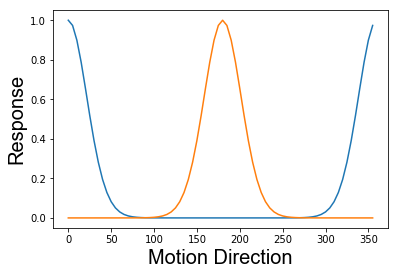

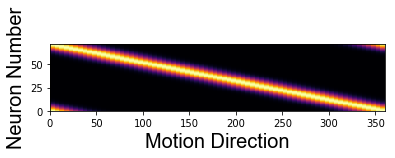

In [19]:
# loop over all possible sigs
fx = np.zeros((N,nDirs))

# loop over neurons...each of which is tuned to nDir[i]
for i in np.arange(N): 
    fx[i,:] = np.exp(k*(np.cos(sDir-nDirPref[i])-1))  #sDir-nDirPref[i]  i=0, 5, 10..
                     
# set up a plotting axis in degrees (from radians)
plt.plot(xAxis, fx[0,])
plt.plot(xAxis, fx[36,])
#plt.plot(xAxis, fx) #plotting all tunning functions!
plt.xlabel('Motion Direction', **fig_font)
plt.ylabel('Response', **fig_font)
plt.show()

# look at the full profile...
plt.imshow(fx, cmap='inferno', extent=[0, 360, 0, N])  # 'viridis', 'plasma', 'inferno', 'magma', etc
plt.xlabel('Motion Direction', **fig_font)
plt.ylabel('Neuron Number', **fig_font)
plt.show()

## Generate approx. figures 1-2 from J&M 2006

Refer to equation 4 from the paper:


$$\log L(\theta) = k \sum_{i=1}^{N}n_{i}{\cos(\theta - \theta_{i})}$$


This is a rewriting of equ 3, where you had:

$$\log L(\theta) = \sum_{i=1}^{N}n_{i}{\log f_{i}(\theta)}$$
 
and falls out because we're using a circular Gaussian (von Mises)

$$f_{i}(\theta) ~= e^{k[\cos (\theta-\theta_{i})-1]}$$
    
which gives equation 4:

$$\log L(\theta) = k \sum_{i=1}^{N}n_{i}{\cos(\theta - \theta_{i})}$$

### Given our bank of sensory neurons with tuning functions, generate a likelihood function to eval the most likely stim given pattern of observed responses
* First, we'll get the response vector to the stimulus of interest this R vector will correspond to the n1...ni vector in the paper
* Bonus - what is wrong with this version of the code??? 
    * re-run this cell several times with non-zero noise...what happens?
    * what is the problem and how to we fix it?

Noise:  0.05


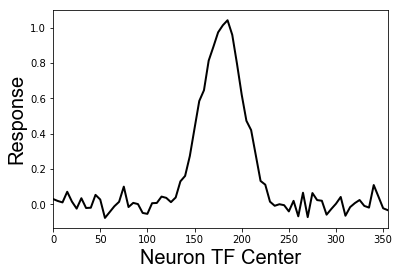

In [20]:
sInd = np.argmin(np.abs(s1-sDir))#s1: stimulus to be figured out; argmin: finding the index(!) of the min value! 

# pull a column out of the matrix that defines our TFs. 
R = fx[:,sInd]

# add noise if desired
print('Noise: ', noise)
if noise:
    R += (np.random.randn(len(R)) * noise)   # problematic! change R also change fx! (because making a view to fx)

# plot
plt.plot(nxAxis, R, 'k-', linewidth=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Neuron TF Center', **fig_font)
plt.ylabel('Response', **fig_font)
plt.show()  # not a tunning curve, but reponse of a population of neurons to a 180 degree stimulus (like paper fig2a)  

### What's wrong with the response vector that we have above?

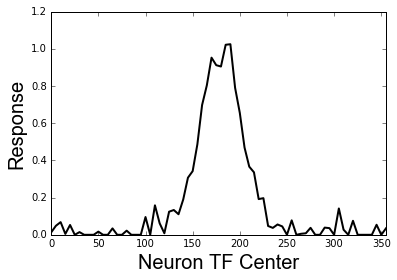

In [7]:
# set all negative responses to zero...
R[R<0]=0

# plot
plt.plot(nxAxis, R, 'k-', linewidth=2)
plt.autoscale(enable=True, axis='x', tight=True) #autoscale handy!
plt.xlabel('Neuron TF Center', **fig_font)
plt.ylabel('Response', **fig_font)
plt.show()

###  Then generate the weights to apply to R. Notice that this is exactly what the cos(theta-theta_pref_i) does...and its related to the magnitude of the response. By 'weight' here I just mean that the neurons that are most tuned to the stim will have the highest SNR response and should thus be 'trusted' the most in computing the log likelihood function. 

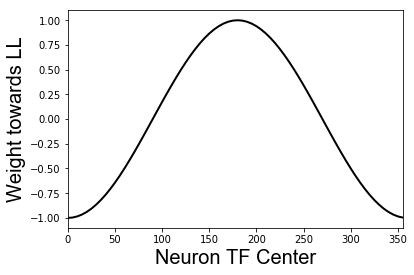

In [23]:
# take the part of the equation from above that computes the weight
w = np.cos(s1 - nDirPref) 

# plot
plt.plot(nxAxis, w, 'k-', linewidth=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Neuron TF Center', **fig_font)
plt.ylabel('Weight towards LL', **fig_font)
plt.show()

### So the neurons tuned to the stimulus should carry the most weight in computing the likelihood - at least in terms of motion direction decoding

### Then compute the full LL for each possible stimulus in our space by looping over neuron, getting its response, and weighting it by its tuning funtion's offset to the stimulus. 

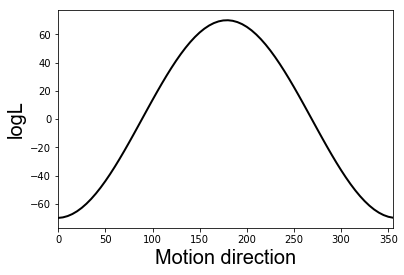

Estimated motion direction: 180.0  Degrees
Actual motion direction: 180.0  Degrees


In [24]:
# initialize an array of zeros...
logl = np.zeros(nDirs)

for s in np.arange(nDirs):
    logl[s] = k * np.sum(R*np.cos(sDir[s]-nDirPref)) #np.cos(sDir[s]-nDirPref) weighting function
                
# plot
plt.plot(xAxis, logl, 'k-', linewidth=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Motion direction', **fig_font)
plt.ylabel('logL', **fig_font)
plt.show()

#MAP estimate of stim direction!
print('Estimated motion direction:', sDir[np.argmax(logl)]*180/pi, ' Degrees') #change noise would change this 
print('Actual motion direction:', s1*180/pi, ' Degrees') 

## Now make Figure 4 from J&M 2006 (sort of) - how to do discrimination between two stims?
* Note that this is a fundamentally different problem compared to just identifying one direction...
* Sometimes the neurons tuned to each stim will be the most informative and carry the most weight, but other times this is not true.
* First define 2 stims - start with stims moving in opposite directions

In [38]:
noise = 0        # noise (IID) of neural responses, set to 0 to make this easier to understand...
s1 = pi
#s2 = 0
s2 = pi+pi/16  #now make s1 s2 similar

### Now regenerate responses...

In [39]:
# to store tfs...
fx = np.zeros((N,nDirs))

# loop over neurons...each of which is tuned to nDirPref[i]
for i in np.arange(N): 
    fx[i,:] = np.exp(k*(np.cos(sDir-nDirPref[i])-1))

## We want to determine which stimulus is most likely given an observed pattern of responses. 

* One common scheme is the neuron/anti-neuron case developed by Newsome in which the likelihood of a given stimulus is a function of activity in neurons tuned to the stimulus minus the activity of neurons tuned to the opposite stimulus (the evil "anti-neurons"). This works fine, but it ignores the contribution of all neurons that aren't tuned to the taregt stimulus (or to the anti-target-stimulus)...i.e. its not an optimal model. 

* An optimal approach, or one that uses all available information, is specified by the present model. 

* What we want is to compute the ratio of the likelihood of each stimulus, so:

$$LR = L(\theta_{1}) / L(\theta_{2})$$


* Going to log space we would have:

$$logLR = \log L(\theta_{1}) - \log L(\theta_{2})$$

* Which is: 

$$logLR = k  \sum_{i=1}^{N}n_{i}[cos(\theta_{1} - \theta_{i})-cos(\theta_{2} - \theta_{i})]$$

* And 

$$cos(\theta_{1} - \theta_{i})$$

is the expected response of each neuron to s1, or the weights that we want to apply to the observed response profile to compute the likelihood of s1...

* And then we do the same for s2. 

### So the weighting function when computing the ratio of the likelihoods is the difference between the weighting functions associated with each individual stimulus. 

In [40]:
# repeat our steps to figure out what the response profile is across neurons for the 
# stimulus that was actually presented (lets say it was s1)
sInd = np.argmin(np.abs(s1-sDir))

# pull a column out of the matrix that defines our TFs. Use COPY!!
R = fx[:,sInd].copy()

if noise:
    R += np.random.randn(len(R))*noise

# fix any negative responses...
R[R<0] = 0 

### Generate the weights for s1 and s2 - this is determined by the expected response of a neuron to each stimulus

In [41]:
w1 = np.cos(s1-nDirPref)  #how much to trust each neuron to discrimiate stim 1 and 2 
w2 = np.cos(s2-nDirPref)

### Contribution of neurons to logL(s1) - this is the actual response of each neuron multiplied by the weight of each neuron (which is the TF, or the expected response of the neuron)

In [42]:
logL1=R*w1

### Then contribution of each neuron to logL(s2)

In [43]:
logL2=R*w2 #how much to trust each neuron to discrimiate stim 1 and 2 

### Compute the actual log likelihood ratio which is the sum of LLR for each neuron

In [44]:
logLR = k * np.sum(R*(w1-w2))

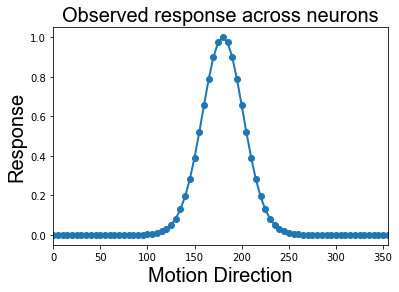

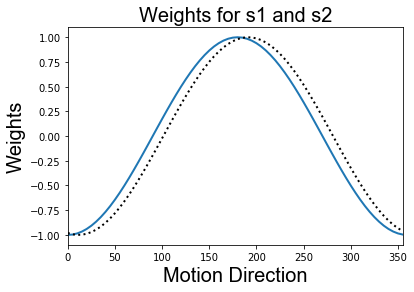

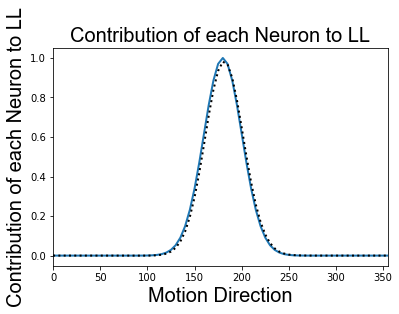

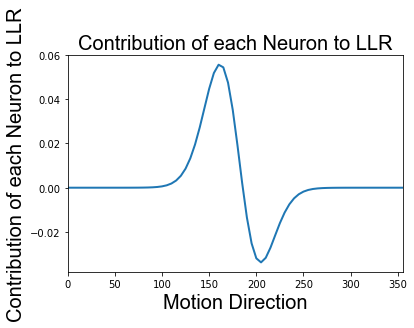

In [45]:
# plot...
plt.plot(nxAxis, R, 'o-', linewidth=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Motion Direction', **fig_font)
plt.ylabel('Response', **fig_font)
plt.title('Observed response across neurons', **fig_font)
plt.show()

plt.plot(nxAxis, w1, '-', linewidth=2)
plt.plot(nxAxis, w2, 'k:', linewidth=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Motion Direction', **fig_font)
plt.ylabel('Weights', **fig_font)
plt.title('Weights for s1 and s2', **fig_font)
plt.show()

plt.plot(nxAxis, logL1, linewidth=2)
plt.plot(nxAxis, logL2, 'k:', linewidth=2)  
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Motion Direction', **fig_font)
plt.ylabel('Contribution of each Neuron to LL', **fig_font)
plt.title('Contribution of each Neuron to LL', **fig_font)
plt.show()

plt.plot(nxAxis, logL1-logL2, linewidth=2)
plt.xlabel('Motion Direction', **fig_font)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Contribution of each Neuron to LLR', **fig_font)
plt.title('Contribution of each Neuron to LLR', **fig_font)
plt.show()

